# Machine Learning Approaches for Magnetic Characterization
### Two-dimensional magnetic materials
Trevor David Rhone, Rensselaer Polytechnic Institute

In [1]:
# import python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import os
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (18,7)

### Download 2D magnetic materials formation energies data set:

Download data from :
https://archive.materialscloud.org/record/2019.0020/v1

Description of data and corresponding study can be found here:
https://www.nature.com/articles/s41598-020-72811-z

- save the file to your google drive (with colab) or your local drive (jupyter notebook).
- Can also upload from github: https://github.com/trevorguru/materials_informatics_tutorial

In [2]:
## Using my local PC, ignore the error or SKIP
# from google.colab import drive
# drive.mount('/content/drive')

Verify mount and check path for the csv file. Change the path below as needed.

In [3]:
# ls

Open and load "magneticmoment_Ef_data.csv" using pandas.

In [4]:
# Create dataframe of "magneticmoment_Ef_data.csv" using pandas.
# Change the path to magneticmoment_Ef_data.csv as needed.

## Since I'm using Windows, I put my path as below **REPLACE with your G-Drive path
data_path = r"C:\Users\User\Documents\GitHub\materials_informatics_tutorial\magneticmoment_Ef_data.csv"
df = pd.read_csv(data_path)

Explore the pandas object by examinging the columns:
- df.column()

A summary of the dataframe:
- df.head()


In [5]:
list(df.columns)

['Unnamed: 0',
 'formation_energy',
 'elem_frac',
 'elem_list',
 'energy',
 'formula',
 'magnetic_moment',
 'spin_index',
 'num_p',
 'num_d',
 'num_f',
 'atomic_rad',
 'atomic_vol',
 'covalent_rad',
 'dipole',
 'eaffinity',
 'num_electrons',
 'atomic_rad_sum_dif',
 'atomic_rad_std_dif',
 'atomic_rad_std',
 'atomic_rad_avg',
 'atomic_rad_max_dif',
 'atomic_vol_sum_dif',
 'atomic_vol_std_dif',
 'atomic_vol_std',
 'atomic_vol_avg',
 'atomic_vol_max_dif',
 'covalentrad_sum_dif',
 'covalentrad_std_dif',
 'covalentrad_std',
 'covalentrad_avg',
 'covalentrad_max_dif',
 'dipole_sum_dif',
 'dipole_std_dif',
 'dipole_std',
 'dipole_avg',
 'dipole_max_dif',
 'eaffinity_sum_dif',
 'eaffinity_std_dif',
 'eaffinity_std',
 'e_affinity_avg',
 'e_affinity_max_dif',
 'numelectron_sum_dif',
 'numelectron_std_dif',
 'numelectron_std',
 'numelectron_avg',
 'numelectron_max_dif',
 'vdwradius_sum_dif',
 'vdwradius_std_dif',
 'vdwradius_std',
 'vdwradius_avg',
 'vdwradius_max_dif',
 'e_negativity_sum_dif',
 '

In [6]:
pd.set_option('max_columns', 100)
df.head(n=3)

,Unnamed: 0,formation_energy,elem_frac,elem_list,energy,formula,magnetic_moment,spin_index,num_p,num_d,num_f,atomic_rad,atomic_vol,covalent_rad,dipole,eaffinity,num_electrons,atomic_rad_sum_dif,atomic_rad_std_dif,atomic_rad_std,atomic_rad_avg,atomic_rad_max_dif,atomic_vol_sum_dif,atomic_vol_std_dif,atomic_vol_std,atomic_vol_avg,atomic_vol_max_dif,covalentrad_sum_dif,covalentrad_std_dif,covalentrad_std,covalentrad_avg,covalentrad_max_dif,dipole_sum_dif,dipole_std_dif,dipole_std,dipole_avg,dipole_max_dif,eaffinity_sum_dif,eaffinity_std_dif,eaffinity_std,e_affinity_avg,e_affinity_max_dif,numelectron_sum_dif,numelectron_std_dif,numelectron_std,numelectron_avg,numelectron_max_dif,vdwradius_sum_dif,vdwradius_std_dif,vdwradius_std,vdwradius_avg,vdwradius_max_dif,e_negativity_sum_dif,e_negativity_std_dif,e_negativity_std,e_negativity_avg,e_negativity_max_dif,nvalence_sum_dif,nvalence_std_dif,nvalence_std,nvalence_avg,nvalence_max_dif,lastsubshell_avg,cmpd_skew_p,cmpd_skew_d,cmpd_skew_f,cmpd_sigma_p,cmpd_sigma_d,cmpd_sigma_f,frac_f,std_ion,sum_ion,mean_ion,Born,hardness_mean,hardness_var,Nup_mean,Nup_var,cs_bob,cs_PE,cs_IR,cs_AR,cs_OX
0,0,-1.152920,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Ge, Element T...",-46.782036,Cr1Co1Ge1Te6P1,2.816,1,4,9,0,"[130.0, 125.0, 137.0, 160.0, 128.0]","[7.23, 6.7, 13.6, 20.5, 17.0]","[122.0, 111.00000000000001, 121.0, 136.0, 111....","[78.4, 57.71, 39.43, 37.0, 24.93]","[0.6659999999999999, 0.66225646, 1.232712, 1.9...","[24, 27, 32, 52, 15]",158.0,0.997877,0.008629,148.0,35,74.740,0.628972,0.172140,16.753,13.8,122.0,0.775396,0.005853,128.1,25,255.30,0.672182,0.154617,42.247,53.47,6.367902,0.959120,0.228103,1.513283,1.30862,164.0,0.761414,0.168444,41.0,37,136.0,0.997729,0.002938,203.3,31,136.0,0.997729,0.002938,203.3,31,22.0,0.807851,0.077778,6.0,5,"[((3, 'd'), 3), ((3, 'd'), 6), ((4, 's'), 1), ...",0.0,0.0,0,1.0,0.666667,0,0,0.887472,43.439369,8.687874,824.839369,3.676485,0.392730,3.20,2.1600,42880.10573,966.64,13.905000,11.50,4917162.56
1,1,-1.325311,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Ge, Element Te]",-46.171992,Cr1Co1Ge2Te6,3.142,1,4,9,0,"[130.0, 125.0, 137.0, 160.0]","[7.23, 6.7, 13.6, 20.5]","[122.0, 111.00000000000001, 121.0, 136.0]","[78.4, 57.71, 39.43, 37.0]","[0.6659999999999999, 0.66225646, 1.232712, 1.9...","[24, 27, 32, 52]",168.0,0.831633,0.009426,148.9,35,71.655,0.762022,0.217875,16.413,13.8,114.0,0.756233,0.005281,129.1,25,213.72,0.745633,0.098059,43.697,41.40,6.738856,0.825943,0.224304,1.561894,1.30862,133.5,0.926019,0.104636,42.7,28,49.5,0.785124,0.000359,206.4,11,49.5,0.785124,0.000359,206.4,11,22.5,0.813333,0.081600,5.9,5,"[((3, 'd'), 3), ((3, 'd'), 6), ((4, 's'), 1), ...",0.0,0.0,0,1.0,0.666667,0,0,0.611701,33.353977,8.338494,824.567397,3.378096,0.045734,3.25,2.6875,44357.76082,984.88,12.438333,11.35,5087200.04
2,2,-1.458288,"[{Element Cr: 0.1}, {Element Co: 0.1}, {Elemen...","[Element Cr, Element Co, Element Si, Element G...",-47.107590,Cr1Co1Si1Ge1Te6,3.149,1,4,9,0,"[130.0, 125.0, 132.0, 137.0, 160.0]","[7.23, 6.7, 12.1, 13.6, 20.5]","[122.0, 111.00000000000001, 115.99999999999999...","[78.4, 57.71, 37.31, 39.43, 37.0]","[0.6659999999999999, 0.66225646, 1.3895211, 1....","[24, 27, 14, 32, 52]",154.0,0.968081,0.007981,148.4,35,67.940,0.701470,0.173773,16.263,13.8,112.0,0.747848,0.004776,128.6,25,206.40,0.918620,0.104747,43.485,41.40,6.681520,0.686061,0.171739,1.577575,1.30862,168.0,0.746740,0.177650,40.9,38,52.0,0.738166,0.000352,206.3,11,52.0,0.738166,0.000352,206.3,11,24.0,0.822917,0.099881,5.9,5,"[((3, 'd'), 3), ((3, 'd'), 6), ((3, 's'), 1), ...",0.0,0.0,0,1.0,0.666667,0,0,0.551463,41.519819,8.303964,824.559724,3.378693,0.036589,3.00,2.4000,42715.38977,991.35,13.955000,11.00,4806565.92


Consider the following target property, y and descriptors, X.

y --> 'formation_energy'

X --> 'std_ion', 'nvalence_avg', 'dipole_max_dif', 'dipole_std_dif','atomic_vol_max_dif','atomic_rad_max_dif'

- Create X and y data
- Perform data visualization

### Data visualization
Task #0

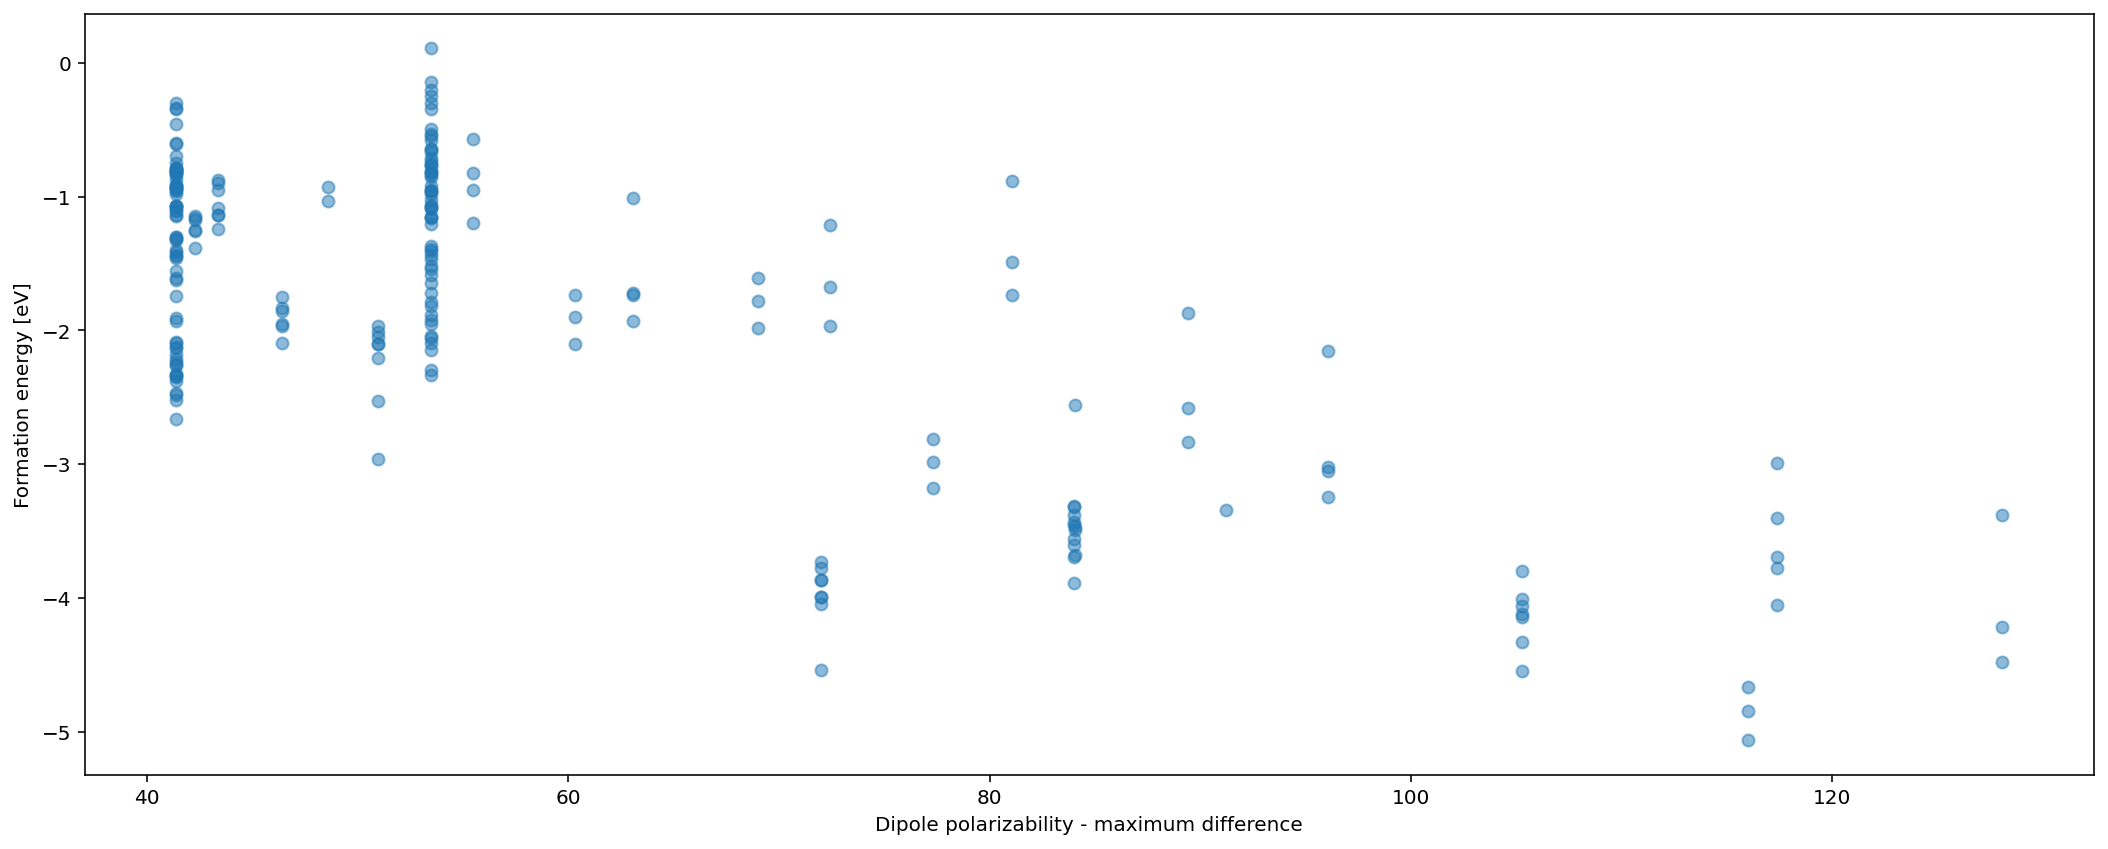

In [7]:
# Visualize your data before attempting model fitting:
X = df[['dipole_max_dif']]
y = df['formation_energy']
plt.scatter(X, y, alpha=0.5)
plt.xlabel("Dipole polarizability - maximum difference")
plt.ylabel("Formation energy [eV]")
plt.show()

Text(0, 0.5, 'Formation energy [eV]')

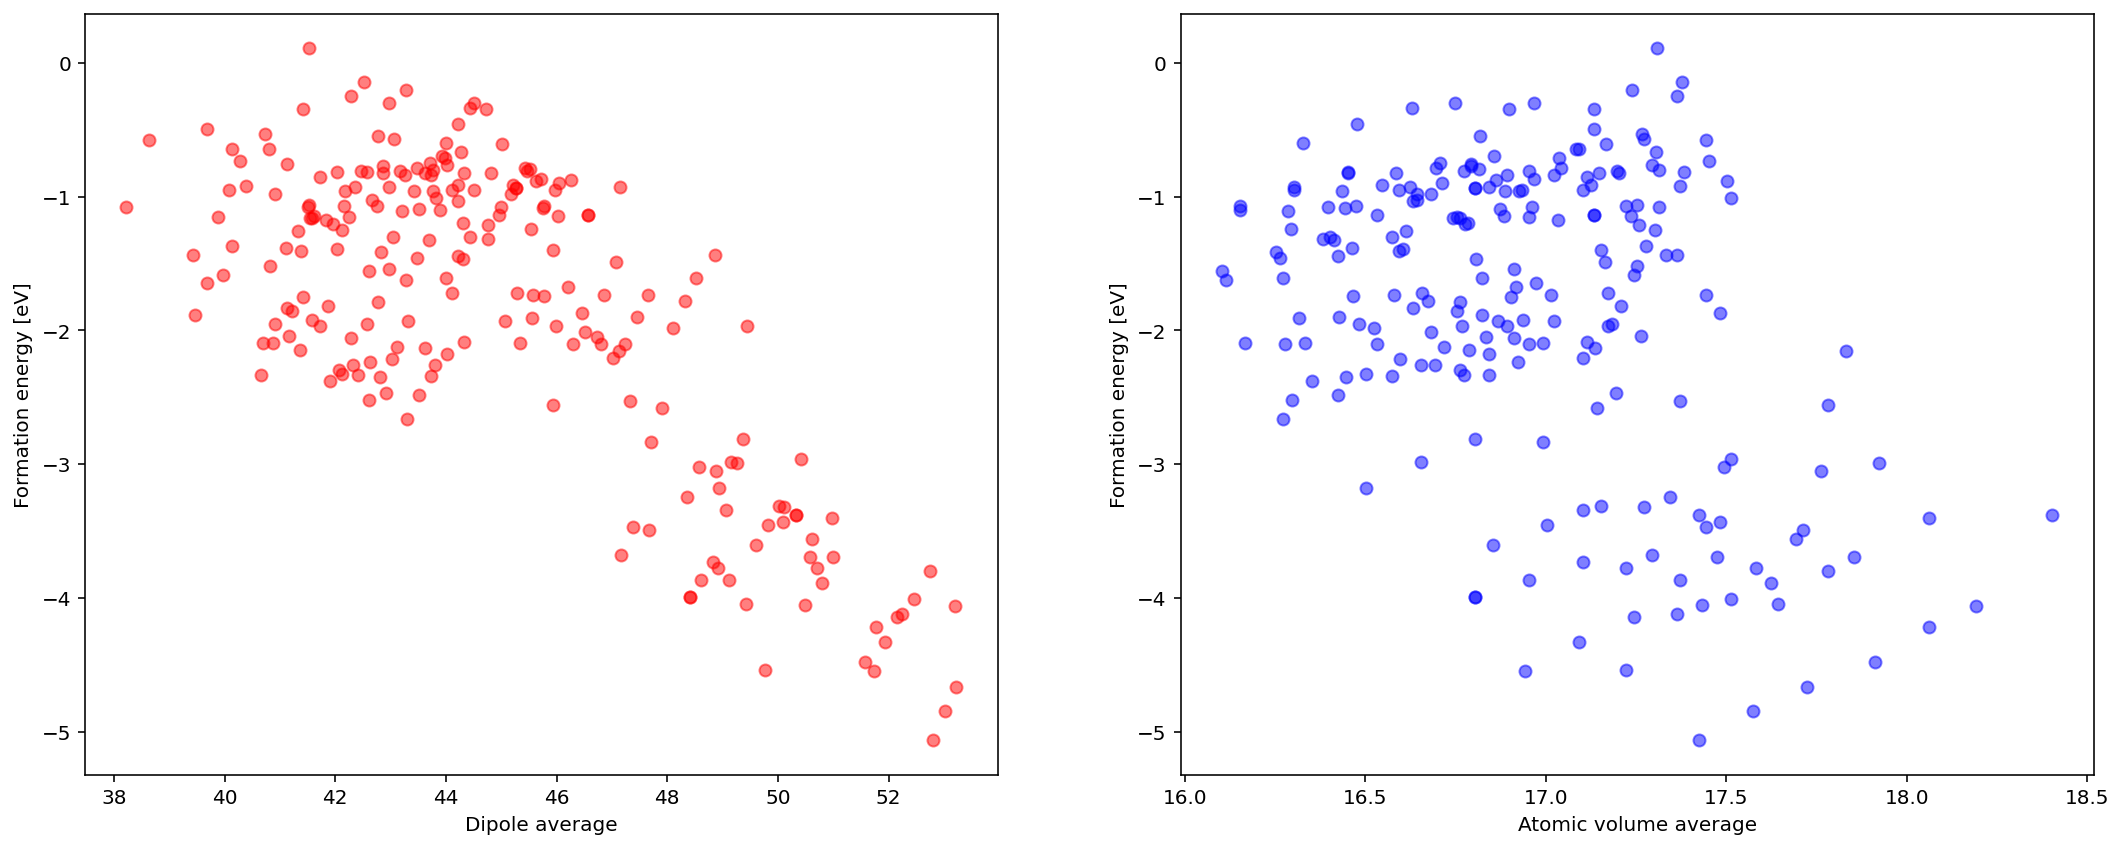

In [8]:
# Visualize more deacriptors:

# Type your code below
# Use subplots to display muptiple plots side by side:
# Modify the following code
# ------
plt.subplot(1,2,1)
plt.scatter(df['dipole_avg'], df['formation_energy'], alpha=0.5, c='r')
plt.xlabel("Dipole average")
plt.ylabel("Formation energy [eV]")
plt.subplot(1,2,2)
plt.scatter(df['atomic_vol_avg'], df['formation_energy'], alpha=0.5, c='b')
plt.xlabel("Atomic volume average")
plt.ylabel("Formation energy [eV]")

It looks like there is a negative correlation between the dipole average and the formation energy.

The atomic volume average property seems to have some groups of linear relationship with the formation energy. See [Simpson's paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox)

## Model creation and prediction
### Linear regression

Task #1:
- Do linear regression using the most important descriptor only (i.e. 'std_ion'). 
- Report the mean squared error and R^2.

See the sklearn documentation for assistance:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [9]:
X = df[['std_ion']] # only one descriptor
X = np.asarray(X)
y = df['formation_energy']

reg = LinearRegression().fit(X, y) # Create model
print("R^2 score", reg.score(X, y)) # Calculate R^2
print("coef_", reg.coef_)
print("intercept_", reg.intercept_)
X_pred = [[0.88],[0.61],[0.55],[0.85]] # Create X data for evaluation
y_pred = reg.predict(X_pred) # make model prediction given X data
print("y_pred", y_pred)

# Write a script to calculate the Mean squared error:
y_pred = reg.predict(X)
MSE = np.sum((y-y_pred)**2)/(2*len(y))
print(f"\nThe mean squared error of Linear model based on std_ion descriptor is {MSE:2.3f}. \n")

R^2 score 0.09518064212060984
coef_ [-1.78411301]
intercept_ -0.31720531603671653
y_pred [-1.88722476 -1.40551425 -1.29846747 -1.83370137]

The mean squared error of Linear model based on std_ion descriptor is 0.582. 



In [10]:
from sklearn.metrics import mean_squared_error
# Checking my calculation with sklearn's MSE equation, which doesn't have the factor of 2 in the denominator
mean_squared_error(y, y_pred)/2

0.5815656081687754

In [11]:
# Trying fitting with another single descriptor

X = np.asarray(df[['e_affinity_avg']])

reg2 = LinearRegression().fit(X, y)
print("R2 score", reg2.score(X,y))
print("coef_", reg2.coef_)
print("intercept_", reg.intercept_)

y_pred = reg2.predict(X)
print("The MSE of the linear model with the average e-affinity descriptor is {}".format(mean_squared_error(y, y_pred)) )

R2 score 0.03788120729049116
coef_ [2.92070893]
intercept_ -0.31720531603671653
The MSE of the linear model with the average e-affinity descriptor is 1.2367887489146712


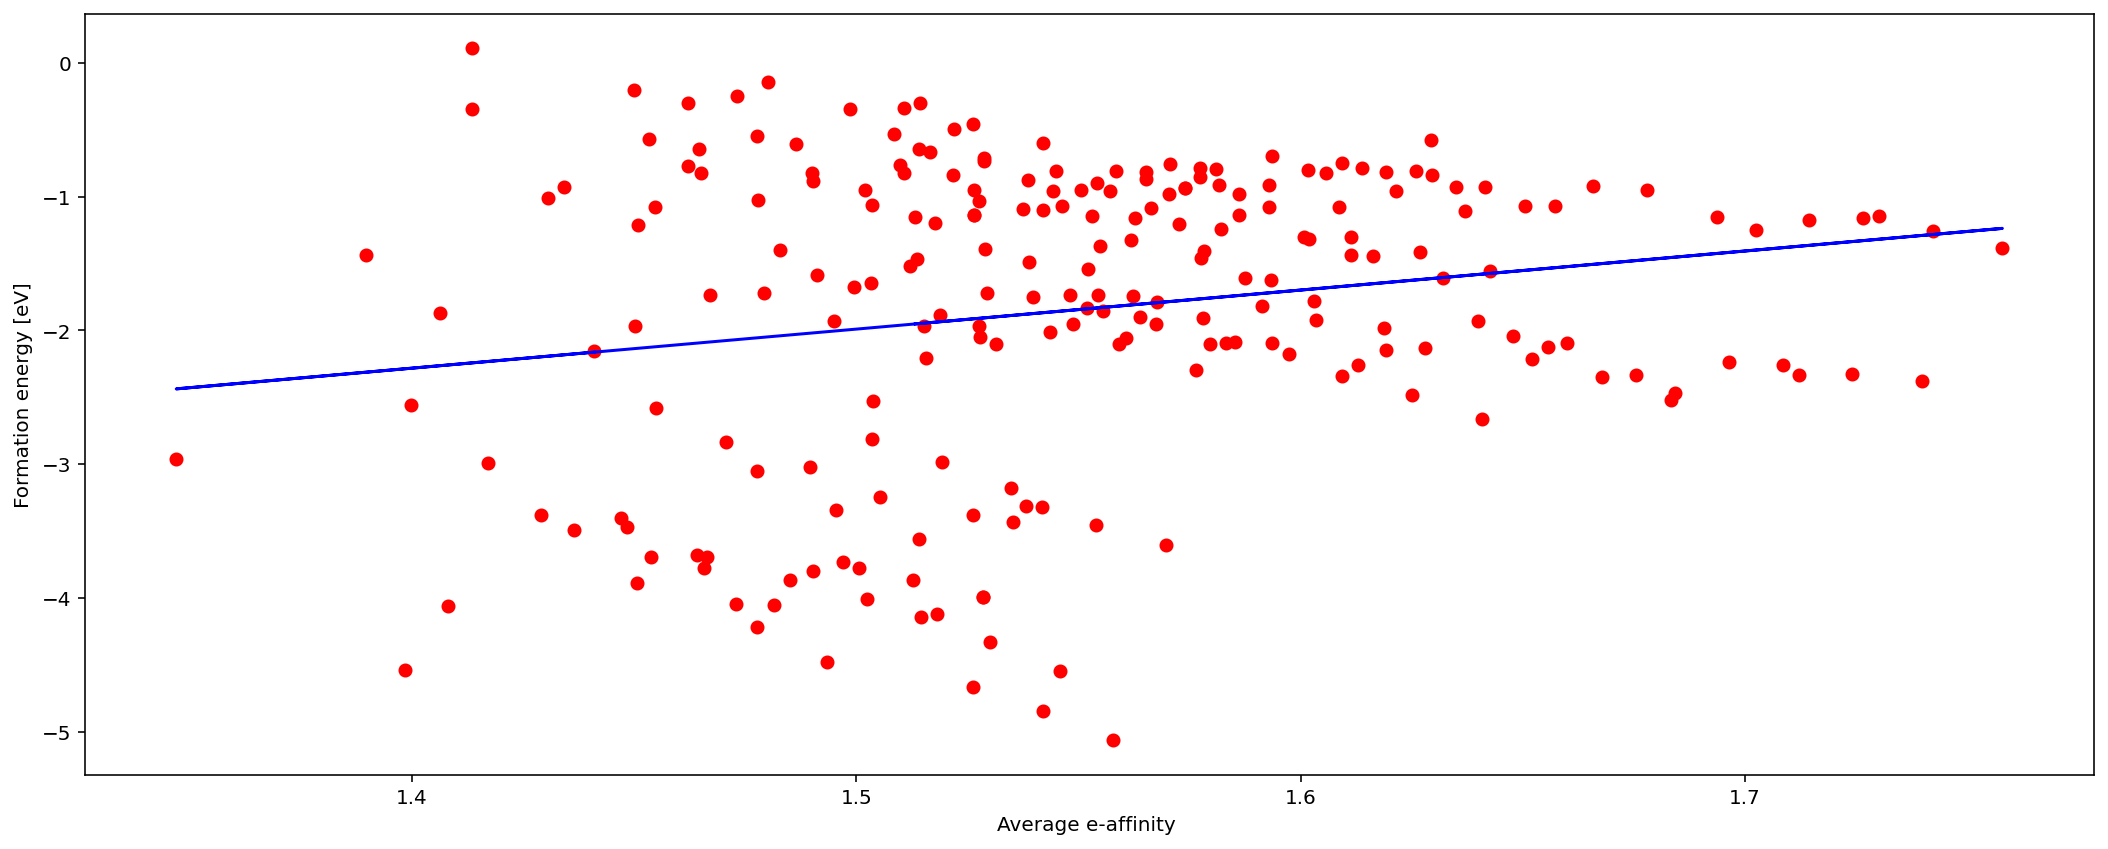

In [12]:
# Plot your model alongside the X and y data.
plt.scatter(X, y, c='r')
plt.plot(X, y_pred, c='b')
plt.xlabel("Average e-affinity ")
plt.ylabel("Formation energy [eV]")
plt.show()


Task #2:
- Do linear regression using all six descriptors above.
- Report the mean squared error and R^2.

See the sklearn documentation for assistance: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [13]:
# type code here...
X = df[['dipole_max_dif', 'dipole_avg', 'atomic_vol_avg', 'std_ion', 'e_affinity_avg']]
reg3 = LinearRegression().fit(X, y)
print("R2 score", reg3.score(X,y))
y_pred = reg3.predict(X)
print("The MSE of the linear model with the selected 5 descriptor is {}".format(mean_squared_error(y, y_pred)))

R2 score 0.7655139002159858
The MSE of the linear model with the selected 5 descriptor is 0.3014282354604354


TASK #3:
- Repeat the above questions but first divide your data into a training set (80%) and test set (20%). Report performance scores on both the training set and test set. 
- Use the sklearn function: train_test_split(X, y, test_size=0.33, random_state=42)
- Import needed modules.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [14]:
from sklearn.model_selection import train_test_split

y = df['formation_energy'].values
X = df[['std_ion']] #one descriptor
# X = df[['std_ion', 'nvalence_avg', 'dipole_max_dif', 'dipole_std_dif','atomic_vol_max_dif','atomic_rad_max_dif']] #six descriptors

# Create X_train, X_test, y_train, y_test

# type code to create train/test split here:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

reg4 = LinearRegression().fit(X_train, y_train)
print("R2 score (train)", round(reg4.score(X_train,y_train),3))
print("R2 score (test)", round(reg4.score(X_test,y_test),3))
y_pred_train = reg4.predict(X_train)
y_pred_test = reg4.predict(X_test)
print("The MSE of linear model with std_ion (train) {:2.3f}".format(mean_squared_error(y_train, y_pred_train)))
print("The MSE of linear model with std_ion (test) {:2.3f}".format(mean_squared_error(y_test, y_pred_test)))


R2 score (train) 0.096
R2 score (test) 0.092
The MSE of linear model with std_ion (train) 1.167
The MSE of linear model with std_ion (test) 1.149


In [15]:
X = df[['dipole_max_dif', 'dipole_avg', 'atomic_vol_avg', 'std_ion', 'e_affinity_avg']]
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

reg5 = LinearRegression().fit(X_train, y_train)
print("R2 score (train)", round(reg5.score(X_train,y_train),3))
print("R2 score (test)", round(reg5.score(X_test,y_test),3))
y_pred_train = reg5.predict(X_train)
y_pred_test = reg5.predict(X_test)
print("The MSE of linear model with selected 5 desc. (train) {:2.3f}".format(mean_squared_error(y_train, y_pred_train)))
print("The MSE of linear model with selected 5 desc. (test) {:2.3f}".format(mean_squared_error(y_test, y_pred_test)))

R2 score (train) 0.766
R2 score (test) 0.755
The MSE of linear model with selected 5 desc. (train) 0.301
The MSE of linear model with selected 5 desc. (test) 0.311


TASK #4
- Use X_train to train a linear model 
- Generate predictions using X_test and X_train

In [16]:
# type code to create the model and to fit the model (use the training data):
## I'm using the 6 descriptors Trevor suggests now as I already trained as usually done in the previous steps
X = df[['std_ion', 'nvalence_avg', 'dipole_max_dif', 'dipole_std_dif','atomic_vol_max_dif','atomic_rad_max_dif']] #six descriptors
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

reg6 = LinearRegression().fit(X_train, y_train)
print("R2 score (train)", round(reg6.score(X_train,y_train),3))
print("R2 score (test)", round(reg6.score(X_test,y_test),3))
print("R2 score (total)", round(reg6.score(X,y),3))
y_pred_train = reg6.predict(X_train)
y_pred_test = reg6.predict(X_test)
y_pred = reg6.predict(X)
print("The MSE of linear model with selected 5 desc. (train) {:2.3f}".format(mean_squared_error(y_train, y_pred_train)))
print("The MSE of linear model with selected 5 desc. (test) {:2.3f}".format(mean_squared_error(y_test, y_pred_test)))
print("The MSE of linear model with selected 5 desc. (total) {:2.3f}".format(mean_squared_error(y, y_pred)))

# type code to generate model predictions and scores (use both the training data and the test set):

R2 score (train) 0.77
R2 score (test) 0.724
R2 score (total) 0.761
The MSE of linear model with selected 5 desc. (train) 0.297
The MSE of linear model with selected 5 desc. (test) 0.349
The MSE of linear model with selected 5 desc. (total) 0.308


Task #5
- Create a random forest regression model. Train it and generate predictions on X_train and X_test.
- Compare the R^2 scores with those from the linear model

In [17]:
## using the 6 descriptors
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_depth=2, random_state=0) 
# NOTE:
# RandomForestRegressor has hyperparameters, such as max_depth, 
# which determines the size of the decision trees used to create the random forest

# Modify the code below and complete the task #5
# ------
rf_model.fit(X, y)
print(rf_model.predict([[0, 0, 0, 0, 0, 0]])) # toy input -> output

print("R2 score LR(train)", round(reg6.score(X_train,y_train),3),'\t', 
      "R2 score RF(train)",round(rf_model.score(X_train,y_train),3))
print("R2 score LR(test)", round(reg6.score(X_test,y_test),3),'\t',  
      "R2 score RF(test)",round(rf_model.score(X_test,y_test),3))

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)
y_pred = reg6.predict(X)

print("The MSE of RF model with selected 5 desc. (train) {:2.3f}".format(mean_squared_error(y_train, y_pred_train)))
print("The MSE of RF model with selected 5 desc. (test) {:2.3f}".format(mean_squared_error(y_test, y_pred_test)))
print("The MSE of RF model with selected 5 desc. (total) {:2.3f}".format(mean_squared_error(y, y_pred)))


[-2.02515275]
R2 score LR(train) 0.77 	 R2 score RF(train) 0.795
R2 score LR(test) 0.724 	 R2 score RF(test) 0.743
The MSE of RF model with selected 5 desc. (train) 0.265
The MSE of RF model with selected 5 desc. (test) 0.325
The MSE of RF model with selected 5 desc. (total) 0.308


Comparing the results of two cells above, we can deduce the RF model performs better even with the max depth of 2.

Task #6

Hyperparameter tuning:
- Tune the 'max_depth' hyperparameter to optimize the random forest model
  - Search an array of possible values of max_depth, 
  - generate a series of corresponding models, 
  - calculate the performance of each model and 
  - determine the best score

Evaluate the following values for max_depth from  1 to 30


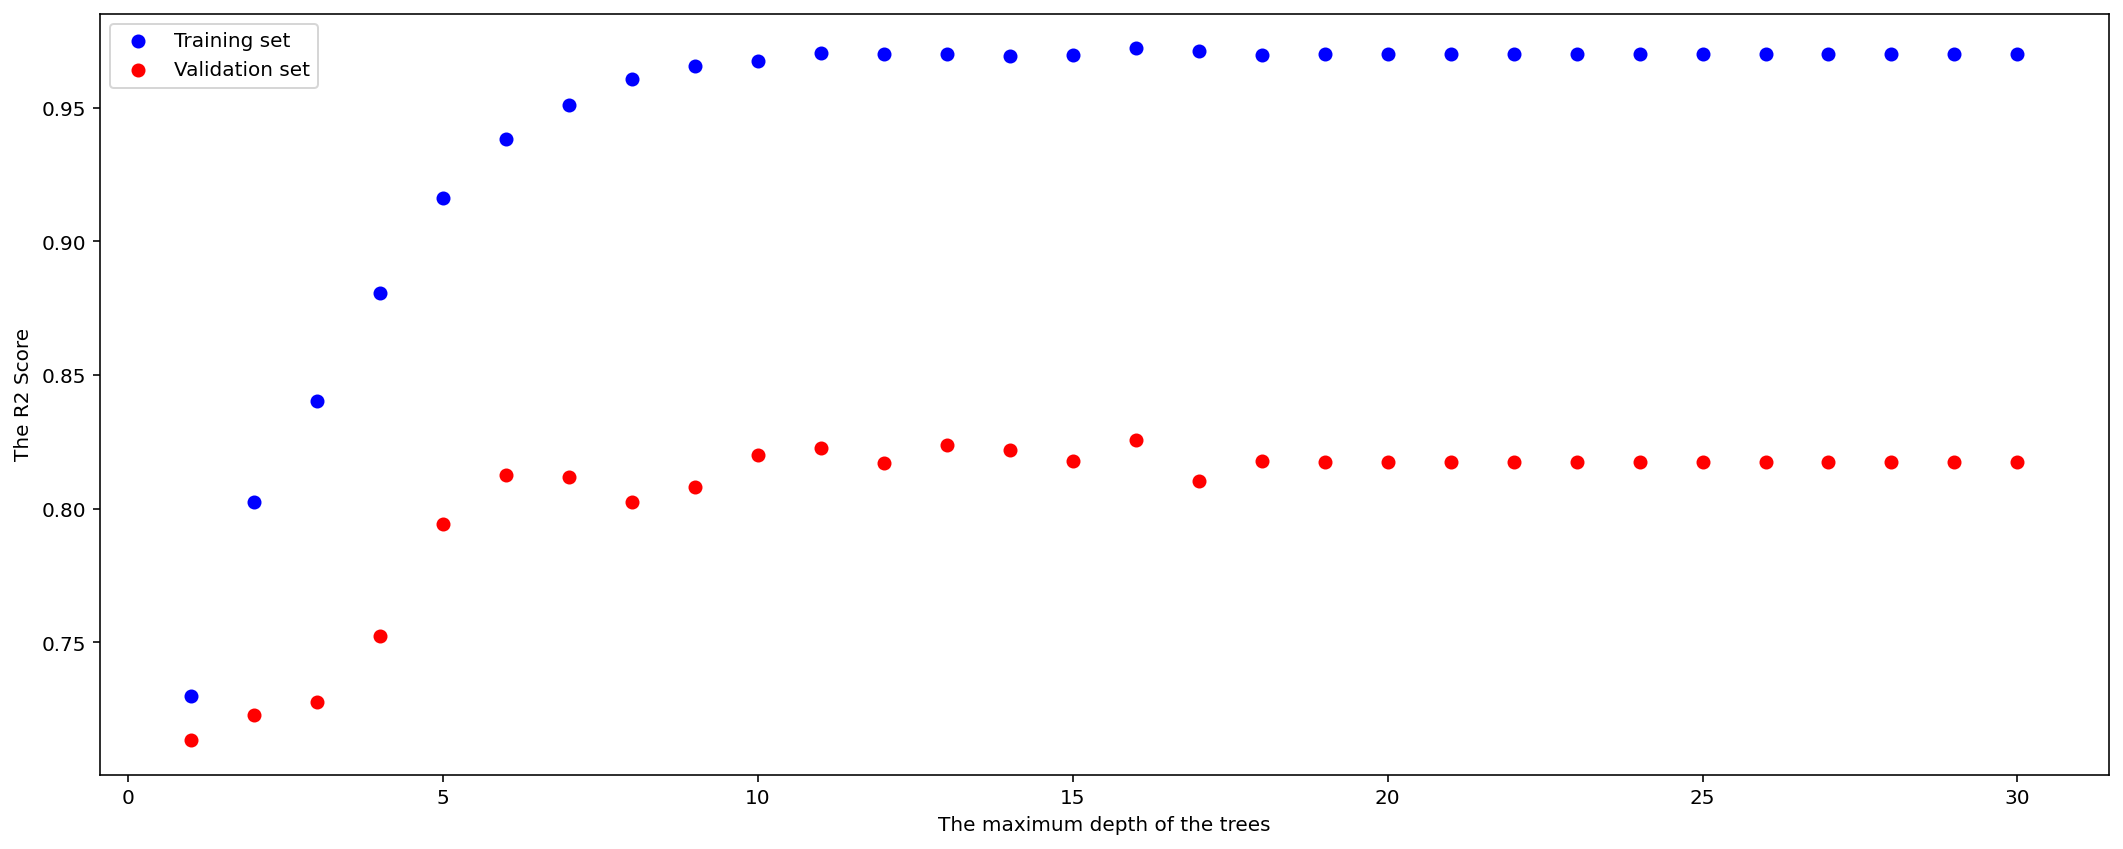

The best number for the max depth of trees obtained from R2 score is 16
The best number for the max depth of trees obtained from MSE error is 16


In [18]:
def hyper_search(X_train, y_train, X_val, y_val):
    """ 
    a function that searches and evaluates a list of hyperparameters 
    """
    max_depth_values = np.arange(30)+1
    print("Evaluate the following values for max_depth from ", min(max_depth_values), 'to', max(max_depth_values)) 
    scores = []
    train_scores = []
    mse_list = list()
    train_mse_list = list()
    
    for ith, max_depth in enumerate(max_depth_values):
        rf_model_i = RandomForestRegressor(max_depth=max_depth, n_estimators = 5, random_state=0)
        rf_model_i.fit(X_train, y_train)
        score = rf_model_i.score(X_val, y_val)
        score_train = rf_model_i.score(X_train, y_train)
        y_val_pred = rf_model_i.predict(X_val)
        y_train_pred = rf_model_i.predict(X_train)
        mse = mean_squared_error(y_val, y_val_pred)
        mse_train = mean_squared_error(y_train, y_train_pred)
        scores.append(score)
        train_scores.append(score_train)
        mse_list.append(mse)
        train_mse_list.append(mse_train)
#         print(ith, score)
    return max_depth_values, scores, mse_list, train_scores, train_mse_list

X = df[['std_ion', 'nvalence_avg', 'dipole_max_dif', 'dipole_std_dif', 'atomic_vol_max_dif', 'atomic_rad_max_dif']] 

# Modify the code below using the training data you created previously
# What is the best hyperparameter for the model?
# X_train = X[:100,:4]
# y_train = y[:100]
# X_val = X[50:80,:4]
# y_val = y[50:80]

## Using the 6 descriptor and calling the test set the validation set now
X_train, X_val, y_train, y_val  = train_test_split(X, y, test_size=0.2, random_state=42)

max_depth_values, r2_valid, mse_valid, r2_train, mse_train = hyper_search(X_train, y_train, X_val, y_val)
plt.scatter(max_depth_values, r2_train, c='b')
plt.scatter(max_depth_values, r2_valid, c='r')
plt.legend(['Training set', 'Validation set'])
# add axis labels
plt.xlabel('The maximum depth of the trees')
plt.ylabel('The R2 Score')
plt.show()

# type code to determine the best hyperparameter for the model below:
print(f"The best number for the max depth of trees obtained from R2 score is {np.argmax(r2_valid)+1}")
print(f"The best number for the max depth of trees obtained from MSE error is {np.argmin(mse_valid)+1}")
# BONUS [come back to this if there's time]:
# Modify code in function to calculate both training and validation predictions/scores
# Plot both the training and test scores


It is evident from the plot above(& below) that the RF model overfits the training set, resultin in a model that underfits the validation.

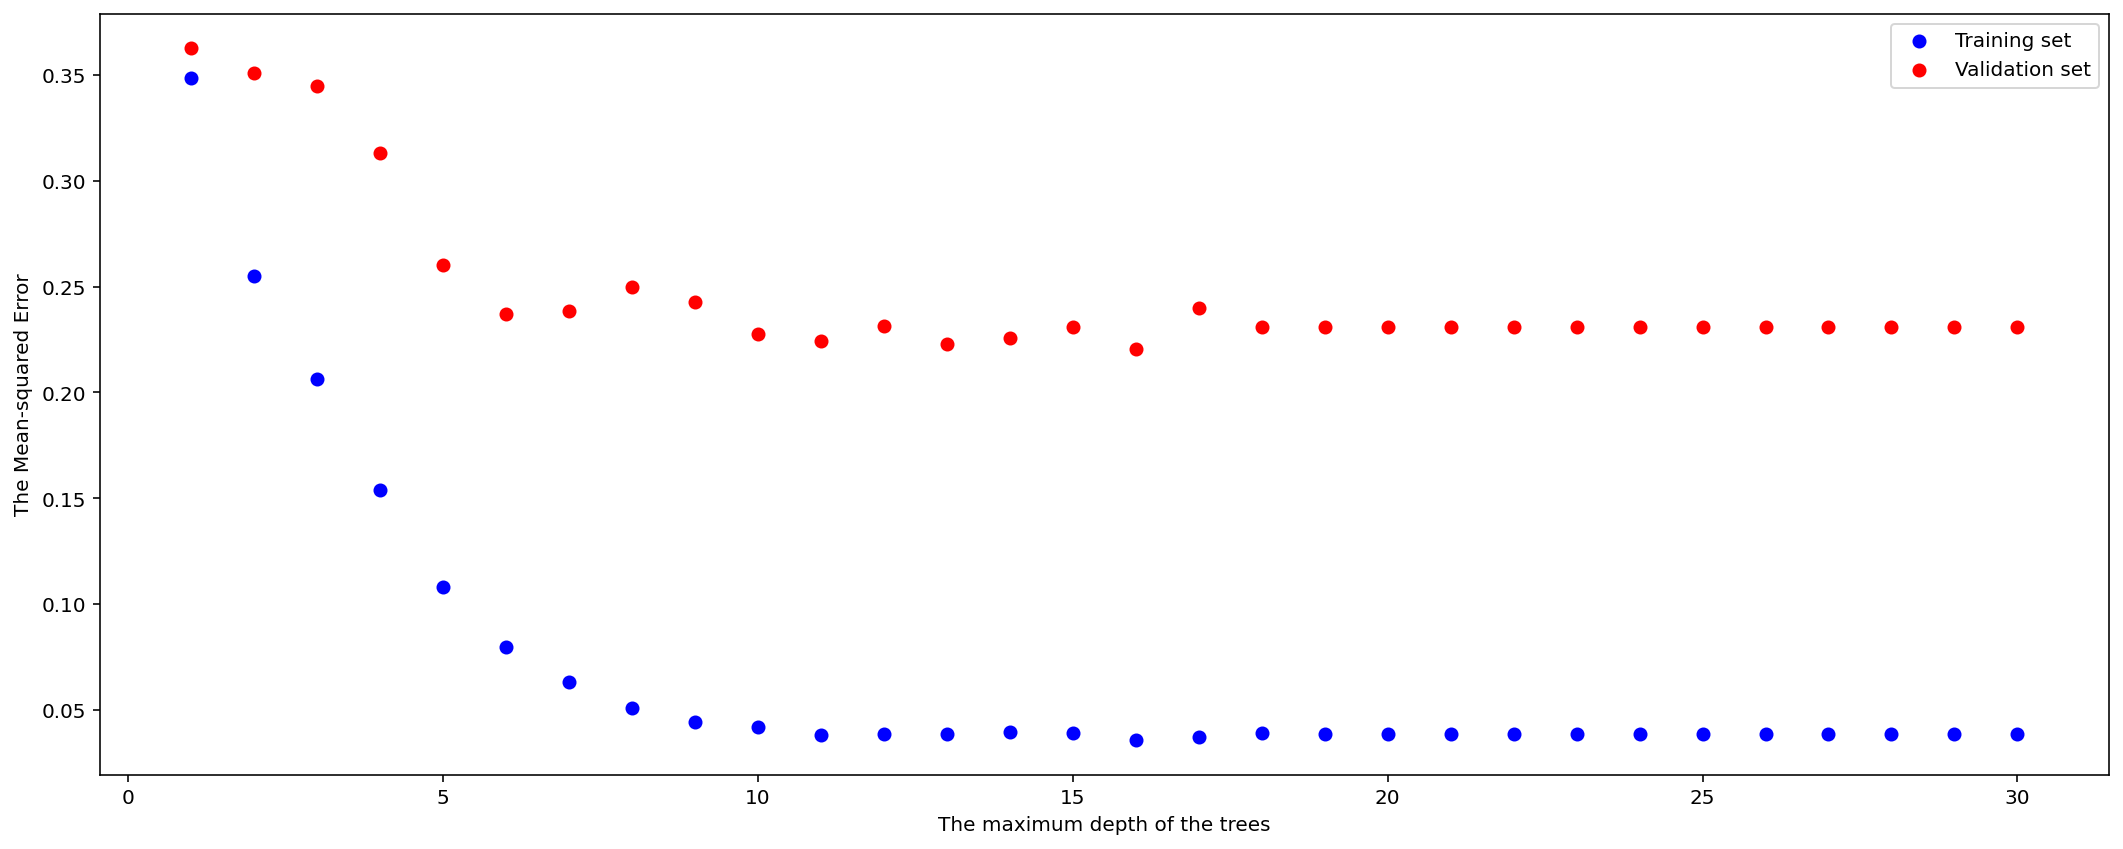

In [19]:
plt.scatter(max_depth_values, mse_train, c='b')
plt.scatter(max_depth_values, mse_valid, c='r')
plt.legend(['Training set','Validation set'])
# add axis labels
plt.xlabel('The maximum depth of the trees')
plt.ylabel('The Mean-squared Error')
plt.show()

Notice that RandomForestRegressor() has more than one hyperparameter.
- Do a two-dimensional grid search instead of a one-dimensional grid search as shown above. (Choose an appropriate range of values for each hyperparameter).
- Display your results using plt.imshow() 
- Determine the best combination of hyperparameters
- Create a model using the best combination of hyperparameters

In [20]:
# write your code here
## sklearn has grid search built-in but let me work with loops for the sake of this task
def grid_search(X_train, y_train, X_val, y_val):
    """ 
    a function that searches and evaluates as a function of two grid search hyperparameter variables:
    1) max_depth from 1 to 16, defining maximum allowed the depth of tree
    2) n_estimators from 10 to 100 with step-size of 10, defining the total number of trees(models) in the forest.
    """
    max_depths = np.arange(16)+1
    num_trees = np.arange(10,101,10) # From 10 to 100 included. increasing in step size of 10
 
    scores = []
    train_scores = []
    mse_list = list()
    train_mse_list = list()
    
    for i, max_depth in enumerate(max_depths):
        for j, n_tree in enumerate(num_trees):
            rf_model = RandomForestRegressor(max_depth=max_depth, n_estimators = n_tree, random_state=42)
            rf_model.fit(X_train, y_train)
            score = rf_model.score(X_val, y_val)
            score_train = rf_model.score(X_train, y_train)
            y_val_pred = rf_model.predict(X_val)
            y_train_pred = rf_model.predict(X_train)
            mse = mean_squared_error(y_val, y_val_pred)
            mse_train = mean_squared_error(y_train, y_train_pred)
            scores.append(score)
            train_scores.append(score_train)
            mse_list.append(mse)
            train_mse_list.append(mse_train)

    def reshape(x):
        x = np.array(x)
        matrix = x.reshape(len(num_trees),len(max_depths))
        return matrix
    
    return max_depths, num_trees, reshape(scores), reshape(mse_list), reshape(train_scores), reshape(train_mse_list)

X_train, X_val, y_train, y_val  = train_test_split(X, y, test_size=0.2, random_state=42)

max_depths, num_trees, r2_valid, mse_valid, r2_train, mse_train = grid_search(X_train, y_train, X_val, y_val)


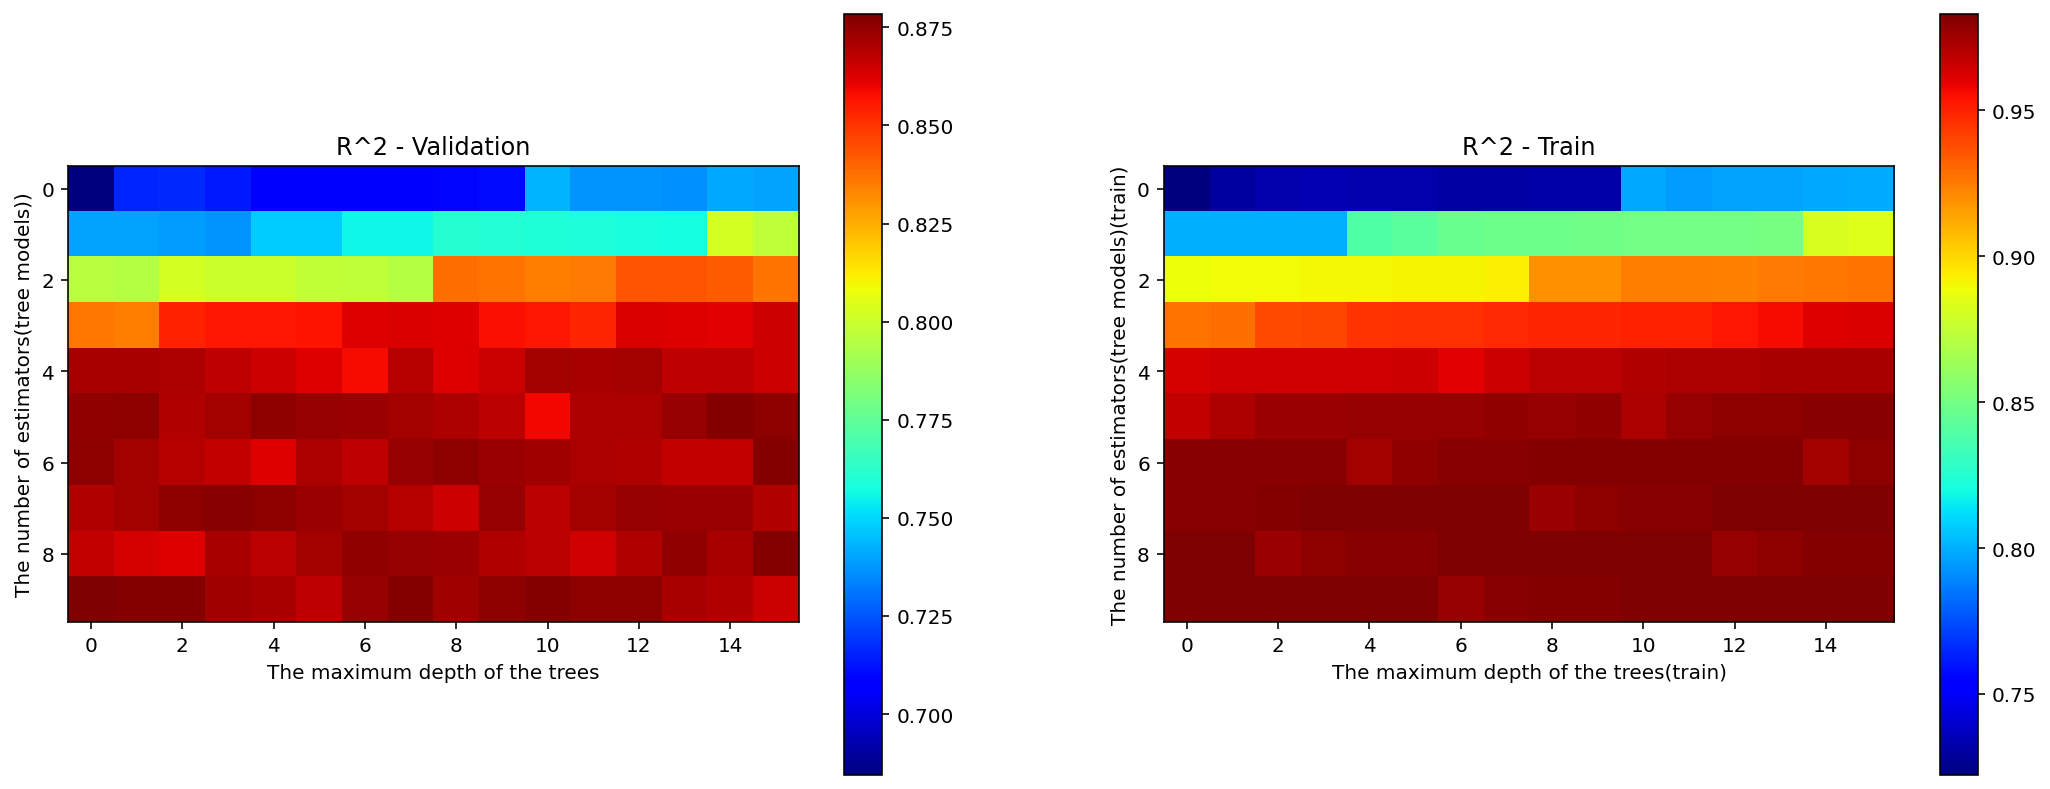

In [21]:
plt.subplot(1, 2, 1)

plt.imshow(r2_valid, cmap='jet')
# add axis labels
plt.xlabel('The maximum depth of the trees')
plt.ylabel('The number of estimators(tree models))')
plt.title('R^2 - Validation')
plt.colorbar()

plt.subplot(1, 2, 2)

plt.imshow(r2_train, cmap='jet')
# add axis labels
plt.xlabel('The maximum depth of the trees(train)')
plt.ylabel('The number of estimators(tree models)(train)')
plt.title('R^2 - Train')
plt.colorbar()
plt.rcParams["figure.figsize"] = (18,6)
plt.show()

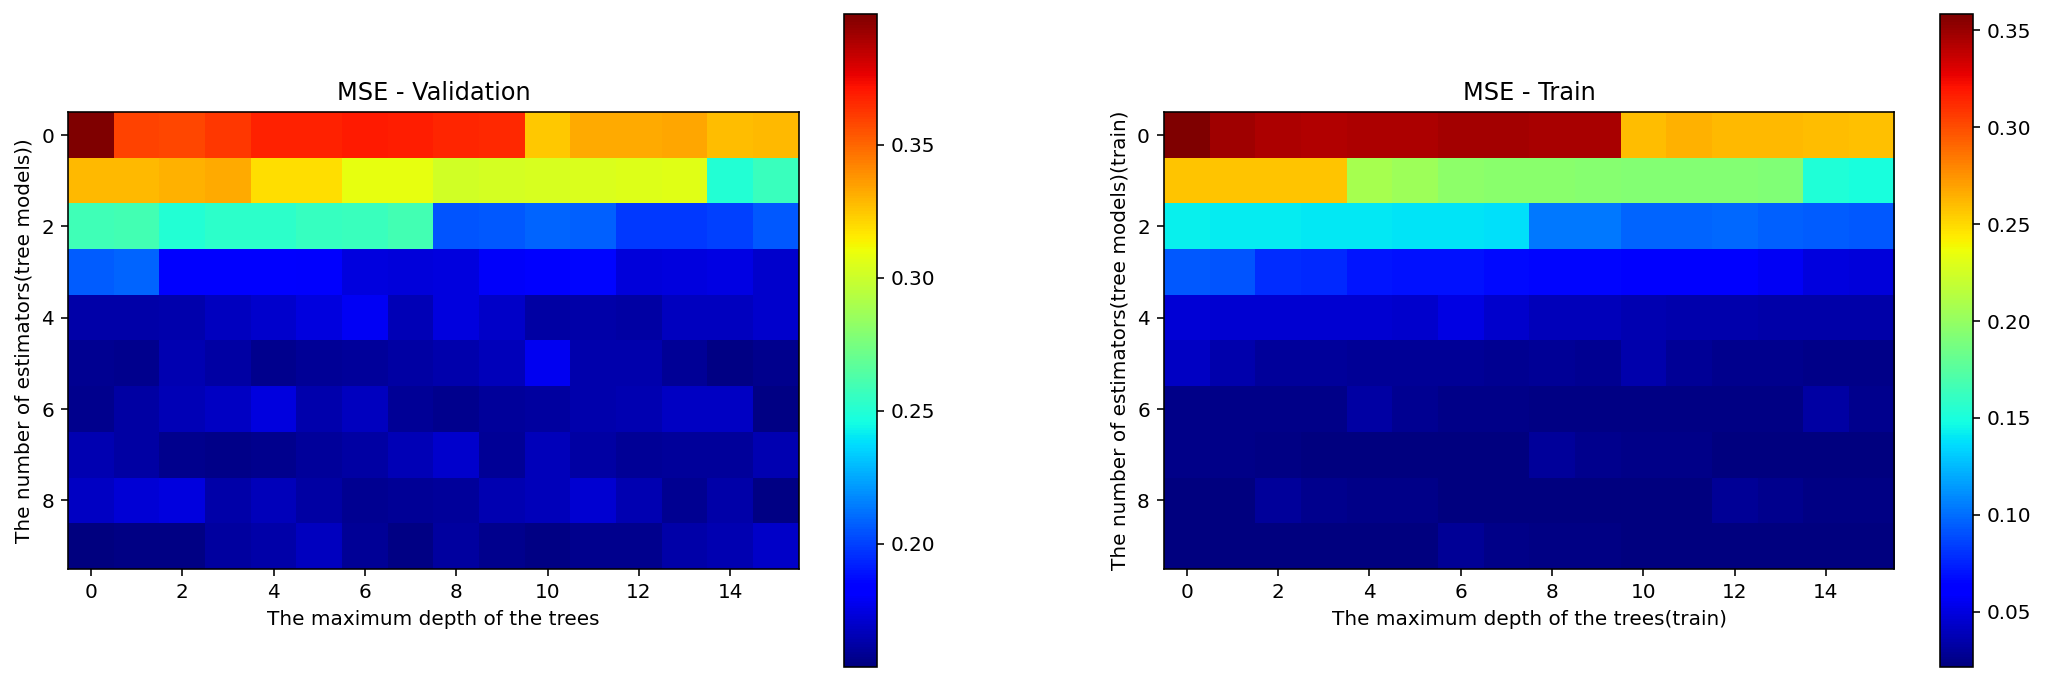

In [22]:
plt.subplot(1, 2, 1)

plt.imshow(mse_valid, cmap='jet')
# add axis labels
plt.xlabel('The maximum depth of the trees')
plt.ylabel('The number of estimators(tree models))')
plt.title('MSE - Validation')
plt.colorbar()

plt.subplot(1, 2, 2)

plt.imshow(mse_train, cmap='jet')
# add axis labels
plt.xlabel('The maximum depth of the trees(train)')
plt.ylabel('The number of estimators(tree models)(train)')
plt.title('MSE - Train')
plt.colorbar()
plt.rcParams["figure.figsize"] = (18,6)

plt.show()

TASK #7
- Plot the DFT formation energy versus the machine learning predicted formation energy for the training set and the test set
  - Use the machine learning model (and hyperparameters) with the best performance
  

In [23]:
# write your code here
print(np.argmax(r2_valid), np.argmin(mse_valid))

print(np.argmax(r2_train), np.argmin(mse_train))

## We use the validation index


144 144
159 159


In [24]:
print('Lets get the indices of best hyperparameters')
[(i,j) for i in np.argmax(r2_valid, axis=0) for j in np.argmax(r2_valid, axis=1) if (i+1)*(j+1)==np.argmax(r2_valid)]

Lets get the indices of best hyperparameters


[(8, 15), (8, 15), (8, 15), (8, 15), (8, 15), (8, 15)]

In [25]:
num_trees[8], max_depths[15]

(90, 16)

In [26]:
rf_model = RandomForestRegressor(max_depth=16, n_estimators = 90, random_state=42)
rf_model.fit(X_train, y_train)
score_valid_best = rf_model.score(X_val, y_val)
score_train_best = rf_model.score(X_train, y_train)
y_val_pred = rf_model.predict(X_val)
y_train_pred = rf_model.predict(X_train)
mse_valid_best = mean_squared_error(y_val, y_val_pred)
mse_train_best = mean_squared_error(y_train, y_train_pred)


In [27]:
mse_valid_best, np.min(mse_valid)

(0.16499008707099402, 0.15374790279970715)

In [28]:
score_valid_best, np.max(r2_valid)

(0.8696247037345568, 0.878508286567076)

It looks like either random_state is not working in session, giving different values in the loop and here, or I made a mistake.

In [29]:
## Train the best model with whole dataset and obtain final model results
rf_model = RandomForestRegressor(max_depth=16, n_estimators = 90, random_state=42)
rf_model.fit(X, y)
R2_final = rf_model.score(X, y)
print('R2 Score', R2_final)
y_pred = rf_model.predict(X)
MSE_final = mean_squared_error(y, y_pred)
print('MSE value', MSE_final)

R2 Score 0.984275944199689
MSE value 0.020213029252202502


The final score should be better than the training scores of the best model, and the grid-search's best training score.

In [30]:
print(R2_final>score_train_best and R2_final>np.max(r2_train))

score_train_best, np.max(r2_train), R2_final

True


(0.9829494425531838, 0.9831971705983242, 0.984275944199689)

In [31]:
print(MSE_final < mse_train_best and MSE_final < np.min(mse_train))


mse_train_best, np.min(mse_train), MSE_final 


True


(0.022004376578900753, 0.021684674351485227, 0.020213029252202502)

#### To-do
* Check random_state and reshape functionality for correctness
* Work with the whole of desciptors - more data mining
* Better visualization (tick labels, better colormaps etc.)

=====================================================================================

CONGRATULATIONS!!! 👏

You've completed the exercises and are well on your way to becoming an expert in materials informatics.